<a href="https://colab.research.google.com/github/BonthuMahavishnu/FMML-ASSIGNMENTS_AND_LABS/blob/main/FMML_Module4_Lab1_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FOUNDATIONS OF MODERN MACHINE LEARNING, IIIT Hyderabad
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.



In [16]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [17]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [18]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [19]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

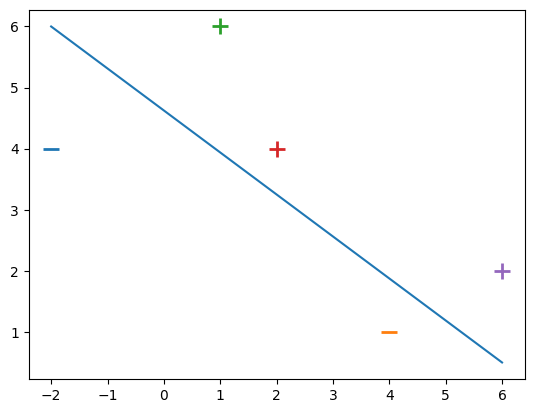

In [20]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

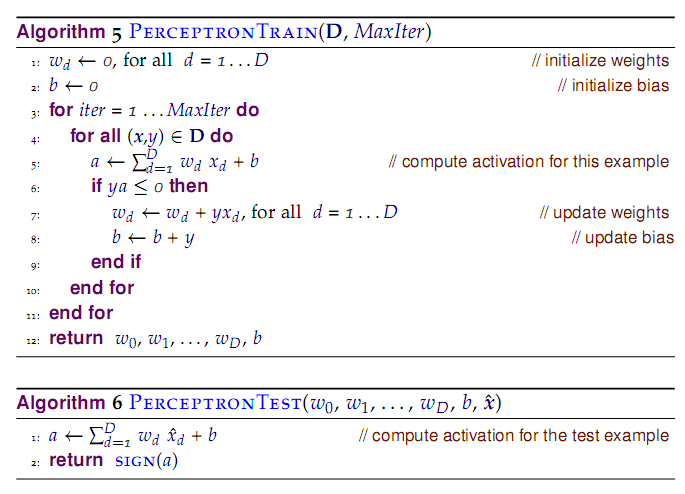

The algorithm is shown in the above image.

In [21]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [22]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

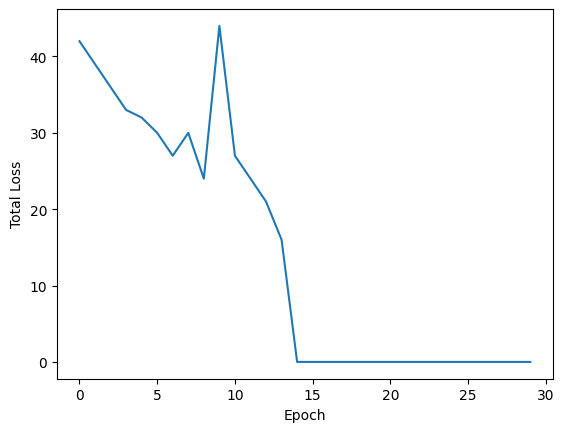

In [23]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

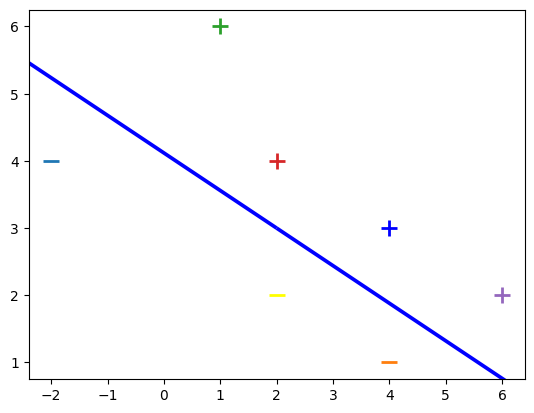

In [24]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
3. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


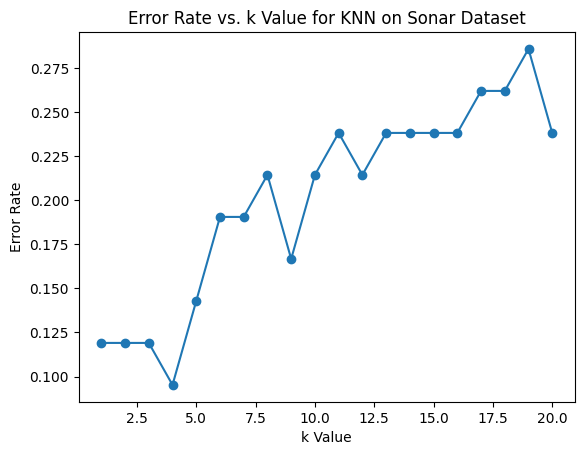

In [25]:
#1. Error Plot for Sonar Dataset:For this, we can use the Sonar dataset and train a k-nearest neighbors (KNN) classifier, similar to the previous example:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

# Load the Sonar dataset
sonar_data = fetch_openml(name='sonar', version=1)
X, y = sonar_data.data, sonar_data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the KNN classifier with different values of k
k_values = list(range(1, 21))
error_rates = []

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    y_pred = knn_classifier.predict(X_test)
    error = 1 - accuracy_score(y_test, y_pred)
    error_rates.append(error)

# Plot the error rates for different values of k
plt.plot(k_values, error_rates, marker='o')
plt.title('Error Rate vs. k Value for KNN on Sonar Dataset')
plt.xlabel('k Value')
plt.ylabel('Error Rate')
plt.show()


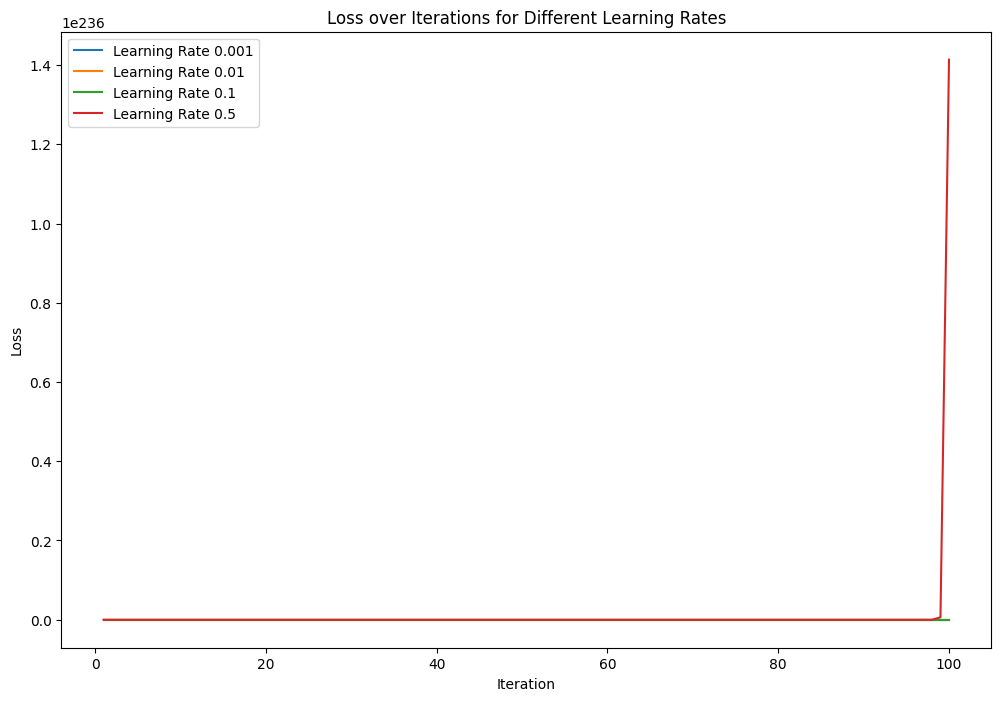

In [26]:
#2. Learning Rate and Convergence:or this part, let's use a simple gradient descent algorithm with a linear regression model and observe the convergence with different learning rates:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(X, y, learning_rate, num_iterations):
    m, n = X.shape
    theta = np.zeros(n)
    loss_history = []

    for _ in range(num_iterations):
        predictions = np.dot(X, theta)
        errors = predictions - y
        gradient = 1/m * np.dot(X.T, errors)
        theta -= learning_rate * gradient

        # Calculate and store the mean squared error
        mse = np.mean((errors)**2)
        loss_history.append(mse)

    return theta, loss_history

# Create a toy dataset (not linearly separable)
X = np.random.rand(100, 1) * 10
y = 2 * X.squeeze() + 1 + np.random.randn(100) * 2

# Add a column of ones to X for the intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Varying learning rates
learning_rates = [0.001, 0.01, 0.1, 0.5]
num_iterations = 100

plt.figure(figsize=(12, 8))

for lr in learning_rates:
    _, loss_history = gradient_descent(X, y, learning_rate=lr, num_iterations=num_iterations)

    # Plot the loss over iterations
    plt.plot(range(1, num_iterations + 1), loss_history, label=f'Learning Rate {lr}')

plt.title('Loss over Iterations for Different Learning Rates')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()
plt.show()


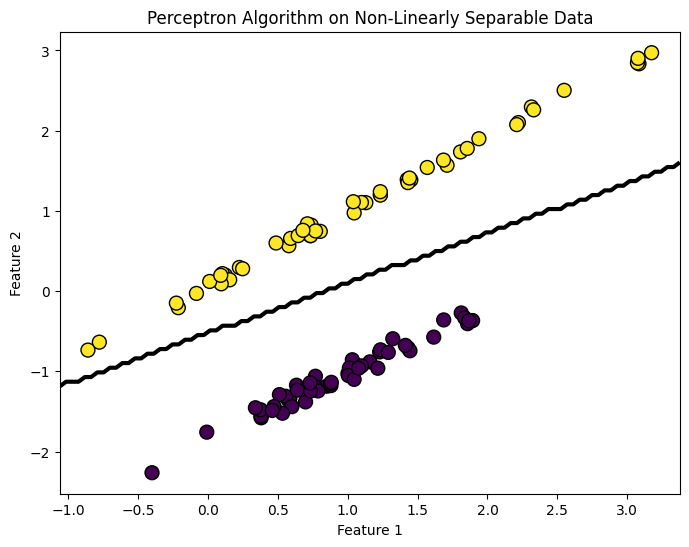

In [27]:
#3. Perceptron Algorithm on Non-Linearly Separable Data:Let's use a non-linearly separable toy dataset and apply the perceptron algorithm:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron

# Create a non-linearly separable dataset
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Train a perceptron model
perceptron_model = Perceptron(max_iter=1000, random_state=42)
perceptron_model.fit(X, y)

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', marker='o', s=100, label='Data Points')
plt.title('Perceptron Algorithm on Non-Linearly Separable Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))
Z = perceptron_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[0], linewidths=3)
plt.show()


In [28]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [29]:
y = np.array([-1, -1, 1, -1, -1])

[-2.  3. 15.]


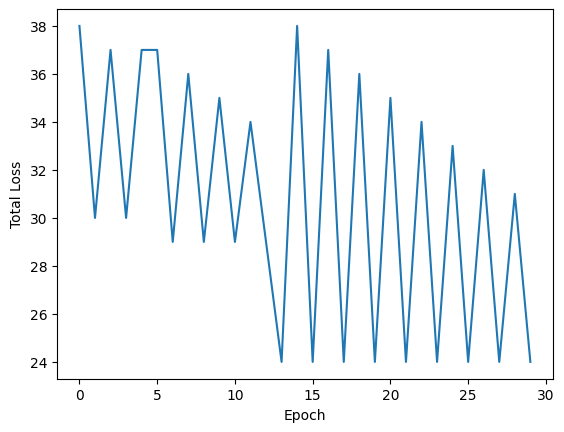

In [30]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.